In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
import warnings

warnings.filterwarnings('ignore')

kmnist = np.load('kmnist-train-imgs.npz')['arr_0']

np.random.seed(23)

indices = np.random.choice(60000,10000)
X = kmnist[indices]

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(X[1].reshape(28,28))

plt.subplot(2,4,3)
plt.imshow(X[2].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(X[3].reshape(28,28))

plt.subplot(2,4,5)
plt.imshow(X[4].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(X[5].reshape(28,28))

plt.subplot(2,4,7)
plt.imshow(X[6].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(X[7].reshape(28,28))

plt.show()

<Figure size 2000x1200 with 8 Axes>

In [2]:
new_X = [X[i].reshape(28*28) for i in range(X.shape[0])]
new_X = [x/256 for x in new_X]

In [136]:
rbm = BernoulliRBM(n_components=100, learning_rate=.06, n_iter=10)
comp = rbm.fit_transform(new_X)

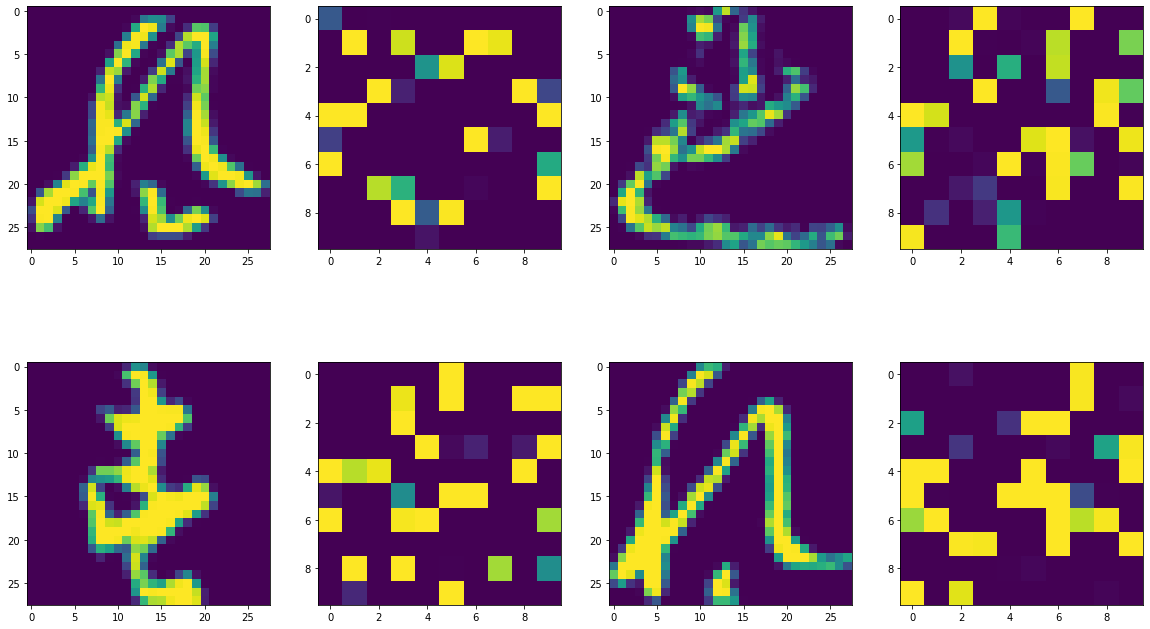

In [137]:
plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(comp[0].reshape(10,10))

plt.subplot(2,4,3)
plt.imshow(X[1].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(comp[1].reshape(10,10))

plt.subplot(2,4,5)
plt.imshow(X[2].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(comp[2].reshape(10,10))

plt.subplot(2,4,7)
plt.imshow(X[3].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(comp[3].reshape(10,10))

plt.show()

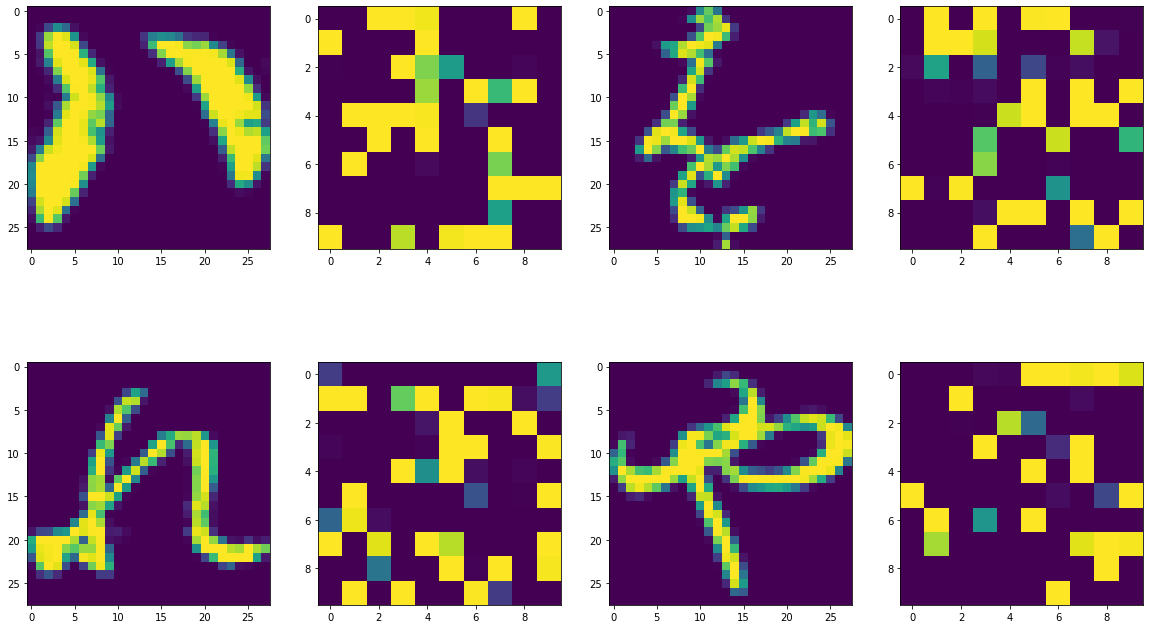

In [6]:
plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[4].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(comp[4].reshape(10,10))

plt.subplot(2,4,3)
plt.imshow(X[5].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(comp[5].reshape(10,10))

plt.subplot(2,4,5)
plt.imshow(X[6].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(comp[6].reshape(10,10))

plt.subplot(2,4,7)
plt.imshow(X[7].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(comp[7].reshape(10,10))

plt.show()

In [124]:
from scipy.signal import convolve

def conv_filter(image, filter_matrix):
    output = []
    for y in range(26):
        output.append(np.repeat(0,26))
        for x in range(26):
            output[y][x] =  convolve(image[y:y+3,x:x+3], filter_matrix, mode='valid')
    return np.array(output)

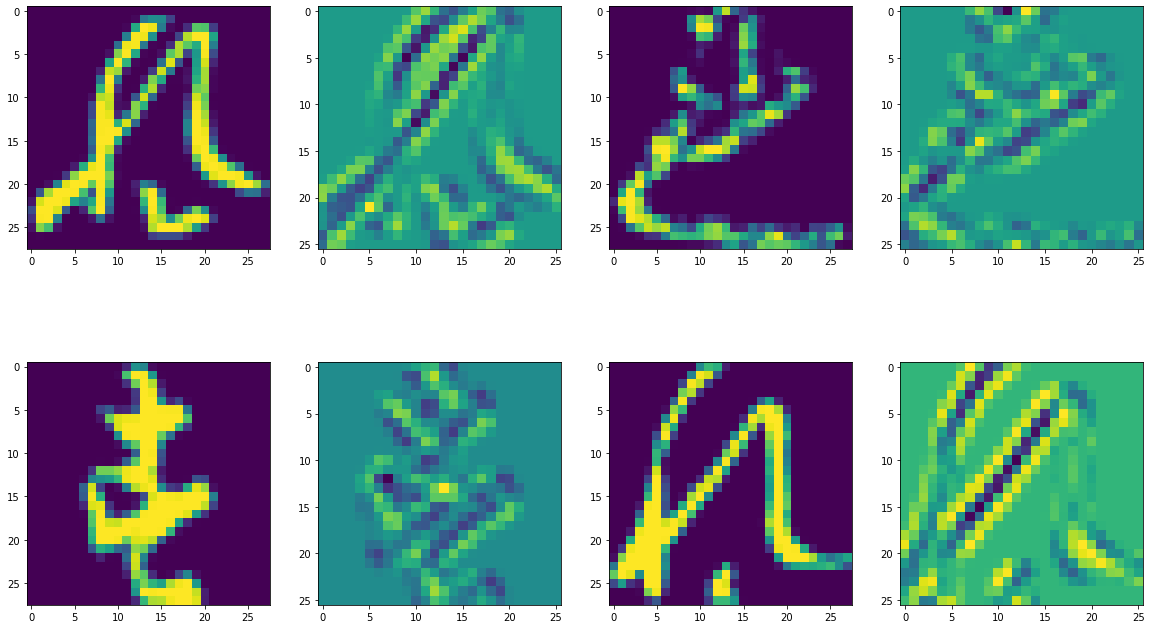

In [127]:
plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(conv_filter(X[0],E))

plt.subplot(2,4,3)
plt.imshow(X[1].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(conv_filter(X[1],E))

plt.subplot(2,4,5)
plt.imshow(X[2].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(conv_filter(X[2],E))

plt.subplot(2,4,7)
plt.imshow(X[3].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(conv_filter(X[3],E))

plt.show()

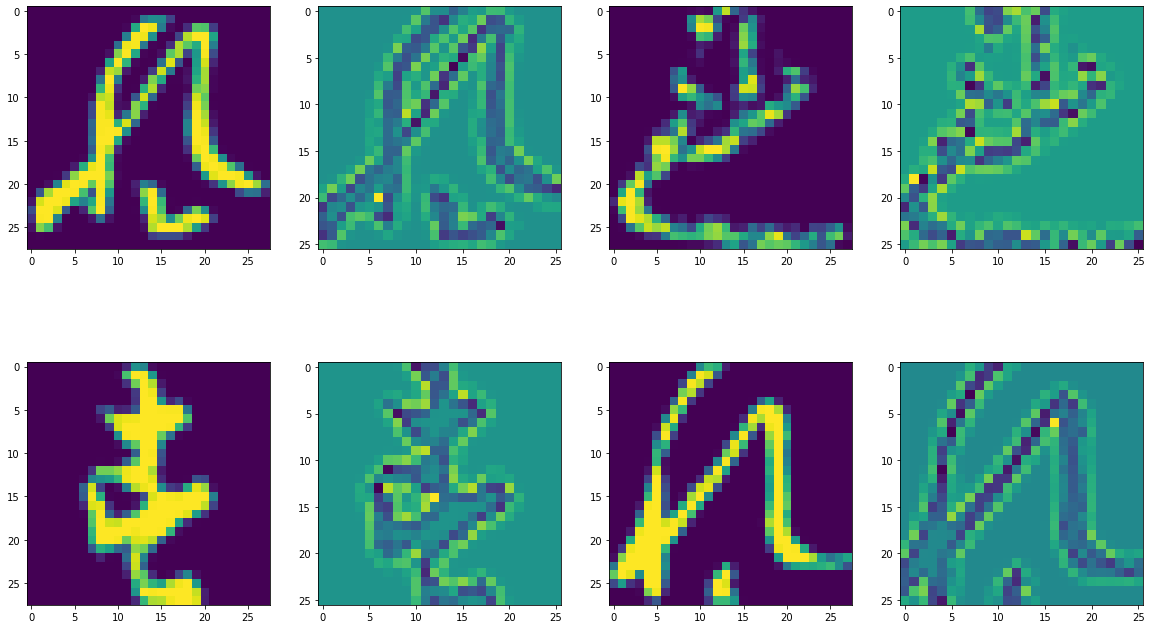

In [128]:
E2 = np.array([[0,1,0],[1,-4,1],[0,1,0]])

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(conv_filter(X[0],E2))

plt.subplot(2,4,3)
plt.imshow(X[1].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(conv_filter(X[1],E2))

plt.subplot(2,4,5)
plt.imshow(X[2].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(conv_filter(X[2],E2))

plt.subplot(2,4,7)
plt.imshow(X[3].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(conv_filter(X[3],E2))

plt.show()

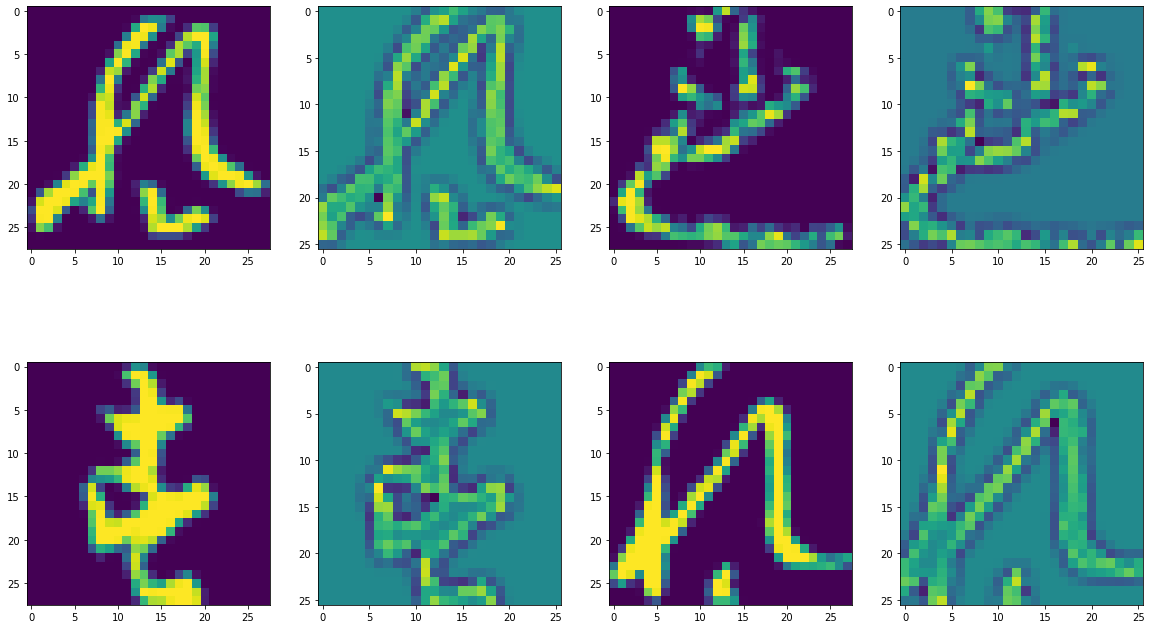

In [129]:
E3 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(conv_filter(X[0],E3))

plt.subplot(2,4,3)
plt.imshow(X[1].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(conv_filter(X[1],E3))

plt.subplot(2,4,5)
plt.imshow(X[2].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(conv_filter(X[2],E3))

plt.subplot(2,4,7)
plt.imshow(X[3].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(conv_filter(X[3],E3))

plt.show()

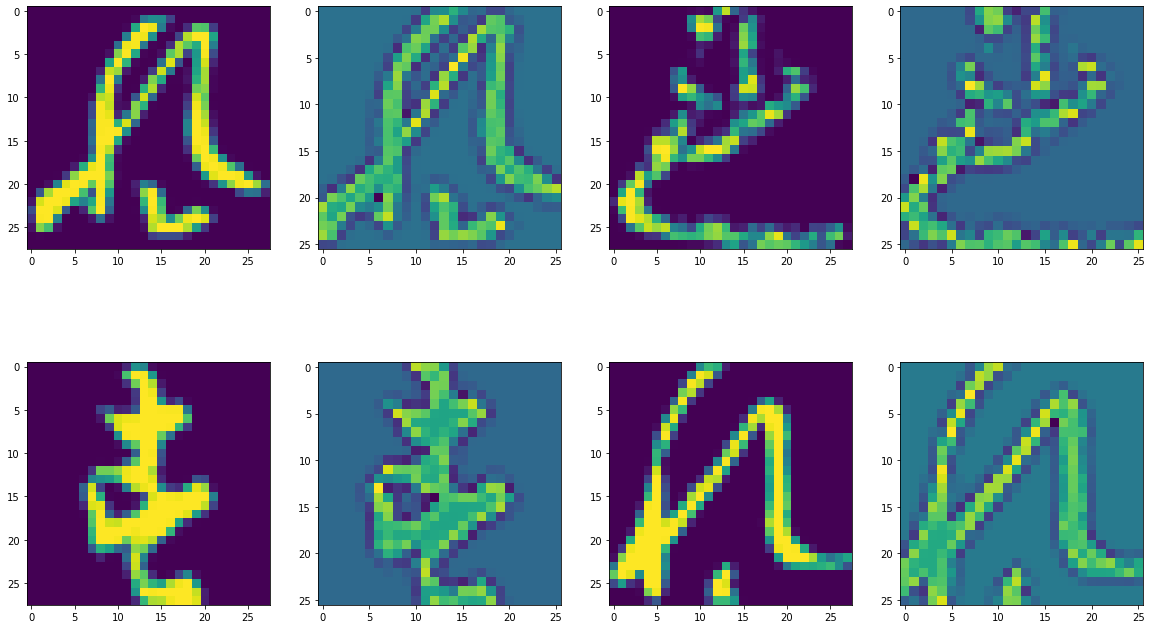

In [130]:
S = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(conv_filter(X[0],S))

plt.subplot(2,4,3)
plt.imshow(X[1].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(conv_filter(X[1],S))

plt.subplot(2,4,5)
plt.imshow(X[2].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(conv_filter(X[2],S))

plt.subplot(2,4,7)
plt.imshow(X[3].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(conv_filter(X[3],S))

plt.show()

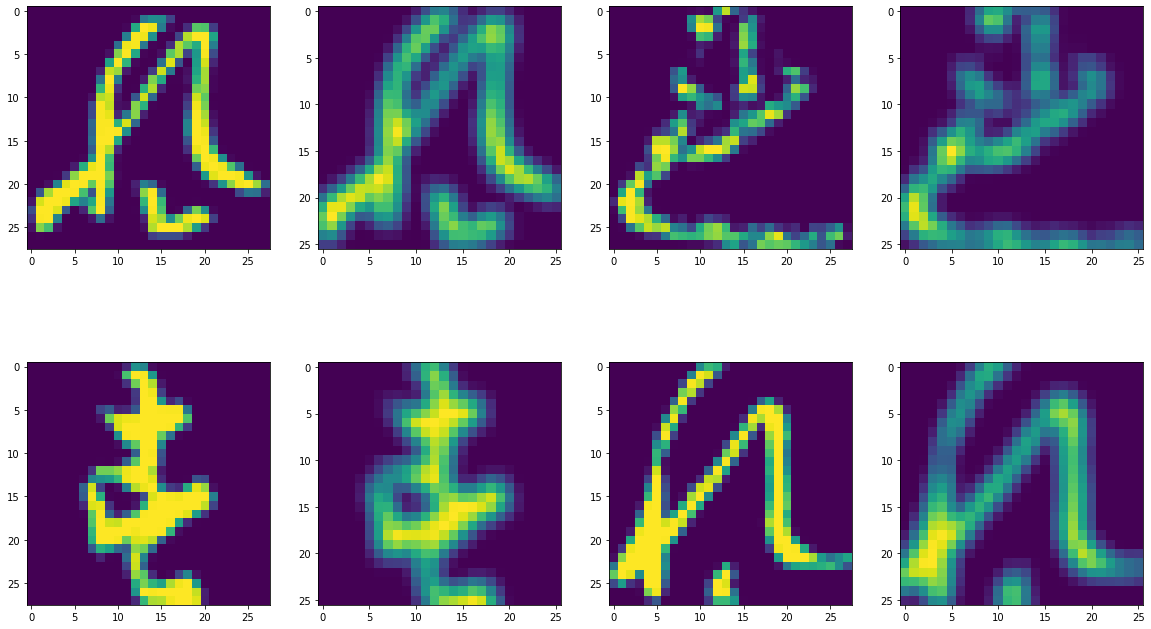

In [131]:
B = np.array([[1,1,1],[1,1,1],[1,1,1]])/9

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(conv_filter(X[0],B))

plt.subplot(2,4,3)
plt.imshow(X[1].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(conv_filter(X[1],B))

plt.subplot(2,4,5)
plt.imshow(X[2].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(conv_filter(X[2],B))

plt.subplot(2,4,7)
plt.imshow(X[3].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(conv_filter(X[3],B))

plt.show()